# Importing supporting libraries

In [1]:
import pandas as pd
import re
import nltk
#nltk.download('punkt')
from nltk.corpus import stopwords
#nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#nltk.download('averaged_perceptron_tagger')
#nltk.download('treebank')

# Opening txt version of the book 'The Alchemist'

The 'txt' version was converted from pdf using an online tool (https://www.pdf2go.com/pdf-to-text)

In [2]:
file = open("The_Alchemist.txt", 'r', encoding = "utf-8")

# Start preprocessing by eliminating whitespaces and empty lines

In [3]:
text = ""
for line in file:
    # Remove leading and trailing spaces (including empty lines)
    cleaned_line = line.strip()
    if cleaned_line == "":
        continue
    text += cleaned_line + " "

text

'THE ALCHEMIST PAULO COELHO PART ONE THE BOY’S NAME WAS SANTIAGO. DUSK WAS FALLING AS the boy arrived with his herd at an abandoned church. The roof had fallen in long ago, and an enormous sycamore had grown on the spot where the sacristy had once stood. He decided to spend the night there. He saw to it that all the sheep entered through the ruined gate, and then laid some planks across it to prevent the flock from wandering away during the night. There were no wolves in the region, but once an animal had strayed during the night, and the boy had had to spend the entire next day searching for it. He swept the floor with his jacket and lay down, using the book he had just finished reading as a pillow. He told himself that he would have to start reading thicker books: they lasted longer, and made more comfortable pillows. It was still dark when he awoke, and, looking up, he could see the stars through the half-destroyed roof. I wanted to sleep a little longer, he thought. He had had the 

# Using regular expressions to further process the element

Here we :-
1. Remove name of the book
2. Remove author name
3. Remove chapter names
4. Remove page numbers
5. Remove special characters

In [4]:
# Regular expression pattern to match "PAULO COELHO"
author_pattern = r'PAULO COELHO '
# Use 're.sub()' method to replace the matched pattern with an empty string
text = re.sub(author_pattern, '', text)


# Regular expression to match "THE ALCHEMIST"
book_pattern = r'THE ALCHEMIST '
'''
# Below code Indicates that only one instance is found in the entire document
matches = re.findall(book_pattern, text)
num_matches = len(matches)
print("Number of matches:", num_matches)
'''
# Replacing pattern with an empty string
text = re.sub(book_pattern, '', text)


# Regular expression to match with chapter number, e.g. "PART ONE", "PART TWO", etc
part_pattern = r'PART [A-Z]+ '
# Replacing pattern with an empty string
text = re.sub(part_pattern, '', text)

# Regular expression to match with page number
page_pattern = r'page [0-9]+'
# Replacing pattern with an empty string
text = re.sub(page_pattern, '', text)

# Special character representation using regular expression
specialchar_pattern = r'[^a-zA-Z0-9\s]'
# Removing special characters
text = re.sub(specialchar_pattern, '', text)

# As the next step of tokenisation we convert each word to lowercase 

In [5]:
text = text.lower()
text

'the boys name was santiago dusk was falling as the boy arrived with his herd at an abandoned church the roof had fallen in long ago and an enormous sycamore had grown on the spot where the sacristy had once stood he decided to spend the night there he saw to it that all the sheep entered through the ruined gate and then laid some planks across it to prevent the flock from wandering away during the night there were no wolves in the region but once an animal had strayed during the night and the boy had had to spend the entire next day searching for it he swept the floor with his jacket and lay down using the book he had just finished reading as a pillow he told himself that he would have to start reading thicker books they lasted longer and made more comfortable pillows it was still dark when he awoke and looking up he could see the stars through the halfdestroyed roof i wanted to sleep a little longer he thought he had had the same dream that night as a week ago and once again he had a

# Tokenisation

As you can see in the below output, alot of the stopwords are present that don't add much value when creating distributions so we remove them in the next step

In [6]:
tokens = nltk.word_tokenize(text)
tokens

['the',
 'boys',
 'name',
 'was',
 'santiago',
 'dusk',
 'was',
 'falling',
 'as',
 'the',
 'boy',
 'arrived',
 'with',
 'his',
 'herd',
 'at',
 'an',
 'abandoned',
 'church',
 'the',
 'roof',
 'had',
 'fallen',
 'in',
 'long',
 'ago',
 'and',
 'an',
 'enormous',
 'sycamore',
 'had',
 'grown',
 'on',
 'the',
 'spot',
 'where',
 'the',
 'sacristy',
 'had',
 'once',
 'stood',
 'he',
 'decided',
 'to',
 'spend',
 'the',
 'night',
 'there',
 'he',
 'saw',
 'to',
 'it',
 'that',
 'all',
 'the',
 'sheep',
 'entered',
 'through',
 'the',
 'ruined',
 'gate',
 'and',
 'then',
 'laid',
 'some',
 'planks',
 'across',
 'it',
 'to',
 'prevent',
 'the',
 'flock',
 'from',
 'wandering',
 'away',
 'during',
 'the',
 'night',
 'there',
 'were',
 'no',
 'wolves',
 'in',
 'the',
 'region',
 'but',
 'once',
 'an',
 'animal',
 'had',
 'strayed',
 'during',
 'the',
 'night',
 'and',
 'the',
 'boy',
 'had',
 'had',
 'to',
 'spend',
 'the',
 'entire',
 'next',
 'day',
 'searching',
 'for',
 'it',
 'he',
 'swe

In [7]:
setStopWords = set(stopwords.words('english'))
print(setStopWords)

{'had', 'don', "aren't", "mustn't", 'so', "she's", 'can', 'she', "that'll", 'doesn', 'at', 'only', 'after', 'nor', 'he', 'your', 'were', 'then', 'from', 'me', 'will', 'mightn', 'you', 'd', "haven't", 'my', 'mustn', 'been', 'but', 'the', "won't", 'down', 'not', 'while', 'both', 'haven', 'yourselves', 'which', 'on', 'should', "doesn't", 'that', "hasn't", "mightn't", "you'd", 'myself', 'until', 'most', "wasn't", 'own', 'ours', 'aren', 'further', 'doing', 'just', "hadn't", 'it', 'where', 'what', 'have', 'himself', 'o', 'wouldn', 'if', 'because', 'whom', 'more', 'are', 'having', 'yours', 'before', 'few', 'i', 'between', 's', 'hadn', 'be', 'their', 'into', 'when', 'itself', 'these', 't', "didn't", 'this', 'up', 'has', 're', 'weren', 'now', 'y', 'our', "you've", "don't", 'his', 'all', "couldn't", 'again', 'ourselves', 'and', 'needn', 'against', 'off', 'during', 'was', 'shouldn', "weren't", 'them', 'as', 'with', 've', 'm', 'themselves', 'why', 'who', 'out', 'in', 'once', 'here', 'too', 'they',

In [8]:
filtered_tokens = [word for word in tokens if word not in setStopWords]
print(filtered_tokens)

['boys', 'name', 'santiago', 'dusk', 'falling', 'boy', 'arrived', 'herd', 'abandoned', 'church', 'roof', 'fallen', 'long', 'ago', 'enormous', 'sycamore', 'grown', 'spot', 'sacristy', 'stood', 'decided', 'spend', 'night', 'saw', 'sheep', 'entered', 'ruined', 'gate', 'laid', 'planks', 'across', 'prevent', 'flock', 'wandering', 'away', 'night', 'wolves', 'region', 'animal', 'strayed', 'night', 'boy', 'spend', 'entire', 'next', 'day', 'searching', 'swept', 'floor', 'jacket', 'lay', 'using', 'book', 'finished', 'reading', 'pillow', 'told', 'would', 'start', 'reading', 'thicker', 'books', 'lasted', 'longer', 'made', 'comfortable', 'pillows', 'still', 'dark', 'awoke', 'looking', 'could', 'see', 'stars', 'halfdestroyed', 'roof', 'wanted', 'sleep', 'little', 'longer', 'thought', 'dream', 'night', 'week', 'ago', 'awakened', 'ended', 'arose', 'taking', 'crook', 'began', 'awaken', 'sheep', 'still', 'slept', 'noticed', 'soon', 'awoke', 'animals', 'also', 'began', 'stir', 'mysterious', 'energy', 'bo

# Creating a frequency distribution of tokens using bar plot

In [9]:
freq_dist = FreqDist(filtered_tokens)
top_freq_tokens = freq_dist.most_common(20)
for token, frequency in top_freq_tokens:
    print(f"{token} : {frequency}")

boy : 492
said : 313
desert : 175
one : 167
man : 161
would : 150
alchemist : 146
old : 127
know : 112
world : 110
could : 105
thought : 97
sheep : 95
people : 93
never : 91
day : 90
things : 84
asked : 82
told : 80
time : 79


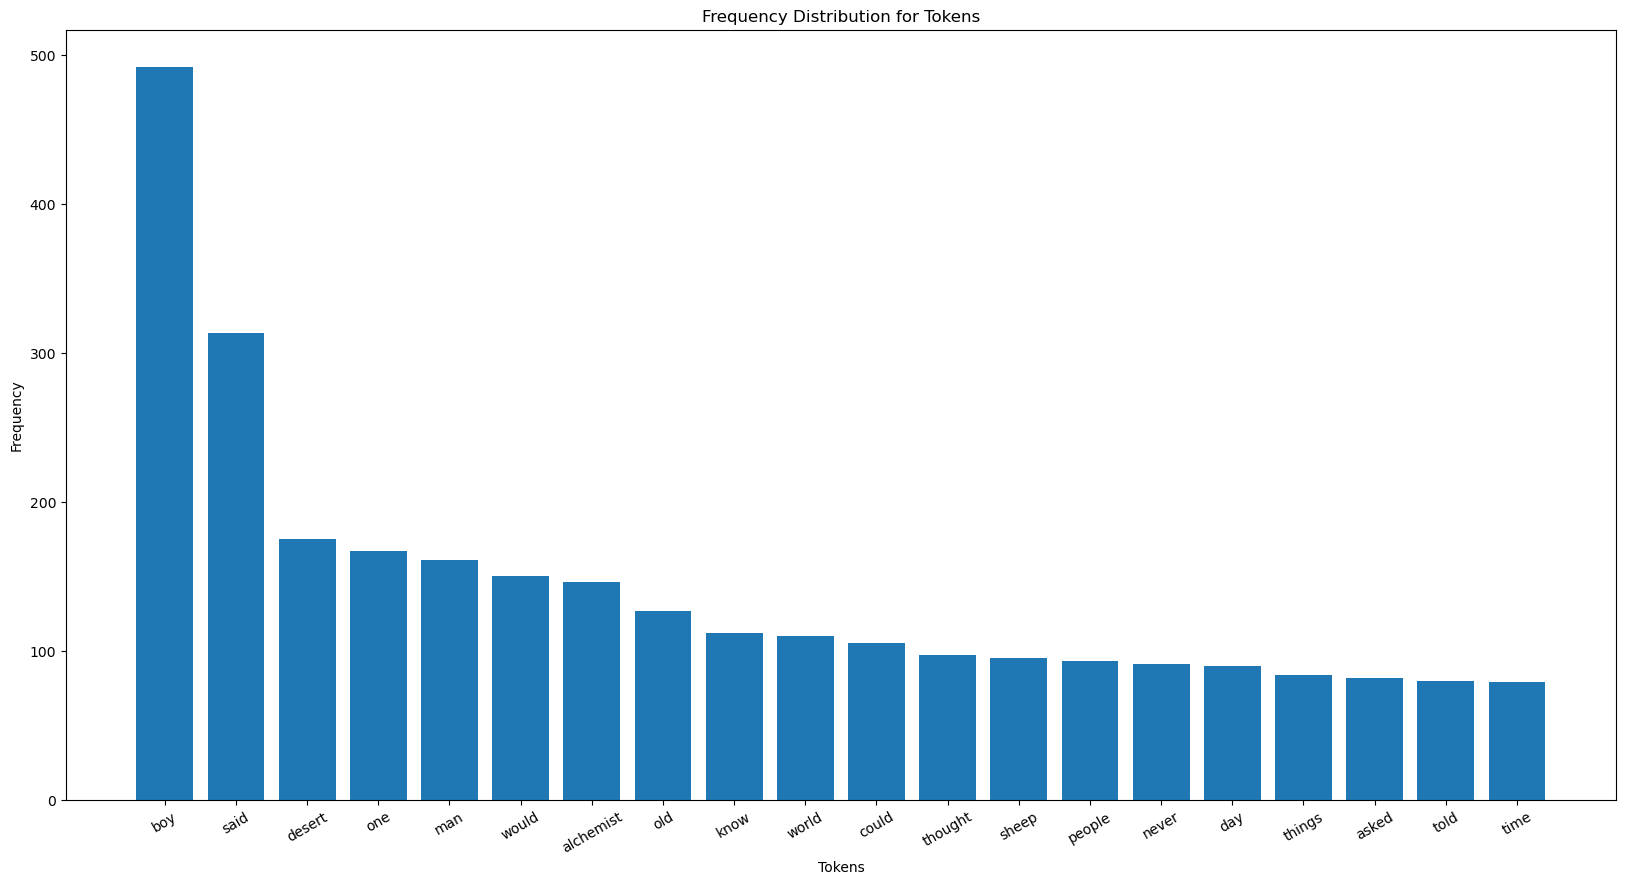

In [10]:
# Creating a bar plot
top_freq_tokens = freq_dist.most_common(20)
tokensList, frequenciesList = zip(*top_freq_tokens)
plt.figure(figsize = (20, 10))
plt.bar(tokensList, frequenciesList)
plt.xlabel("Tokens")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)  # Rotate the x-axis labels for better readability
plt.title('Frequency Distribution for Tokens')
plt.show()

# Creating a wordcloud as pictorial representation of the distribution

In [11]:
# Join the filtered tokens to form a single string
text_wordCloud = ' '.join(filtered_tokens)
wordcloud = WordCloud(width = 800, height = 400, background_color='white').generate(text_wordCloud)

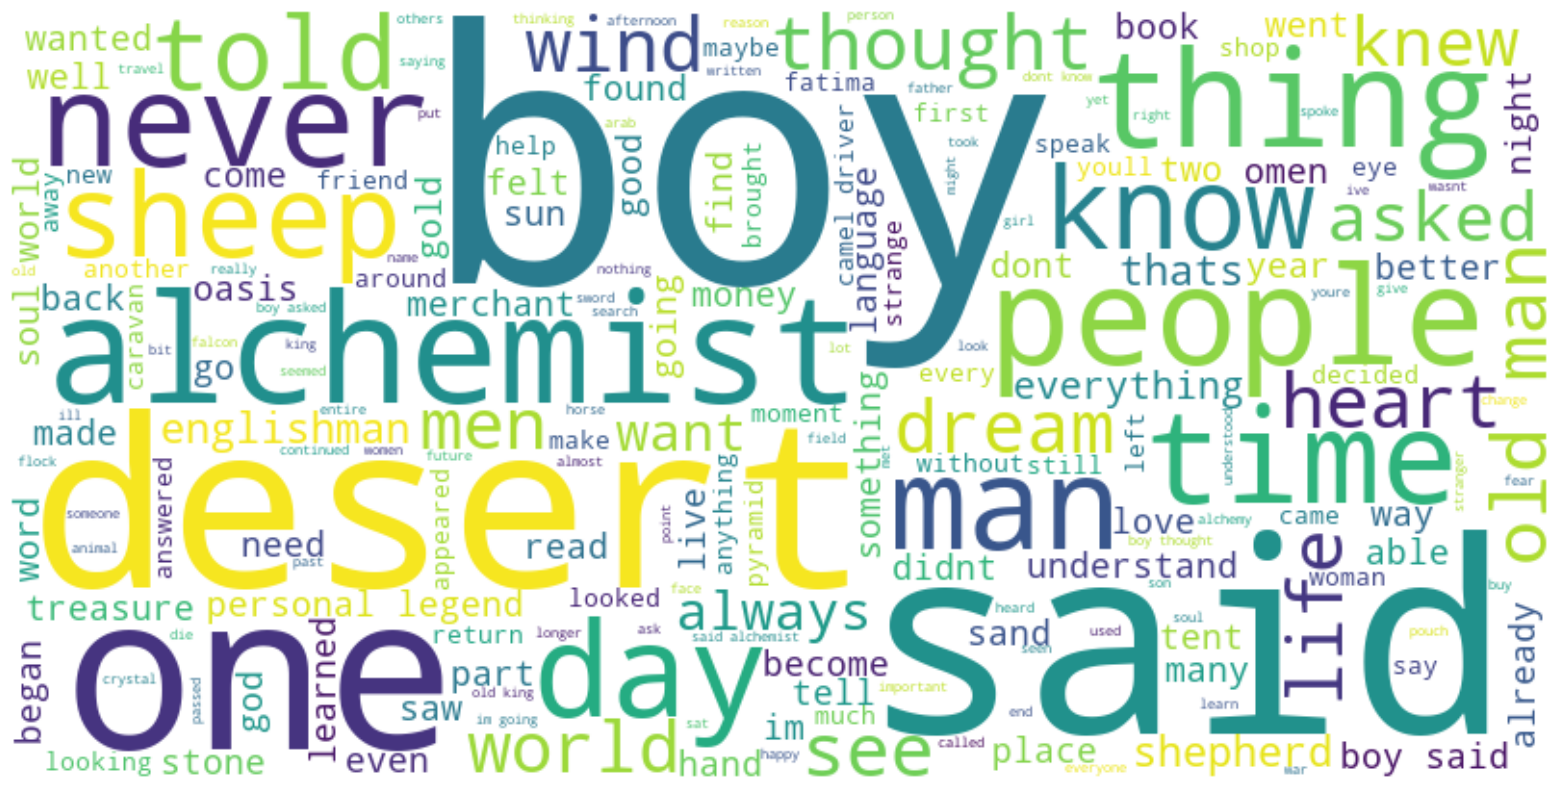

In [12]:
# Creating a wordcloud plot
plt.figure(figsize = (20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

# POS TAGGING

In [13]:
# POS tagging using treebank tagset
pos_tags = nltk.pos_tag(filtered_tokens)

# Tags of first 30 words to manually check accuracy
count = 0
for word, tag in pos_tags:
    if (count > 30):
        break
    print(f"{word}: {tag}")
    count = count + 1

boys: NNS
name: NN
santiago: RB
dusk: VBD
falling: VBG
boy: NN
arrived: VBD
herd: NN
abandoned: VBN
church: NN
roof: NN
fallen: VBN
long: RB
ago: RB
enormous: JJ
sycamore: NN
grown: JJ
spot: NN
sacristy: JJ
stood: NN
decided: VBD
spend: JJ
night: NN
saw: VBD
sheep: RB
entered: VBN
ruined: VBN
gate: NN
laid: NN
planks: NNS
across: IN


# Seeing the frequency distribution of tags on given tokens

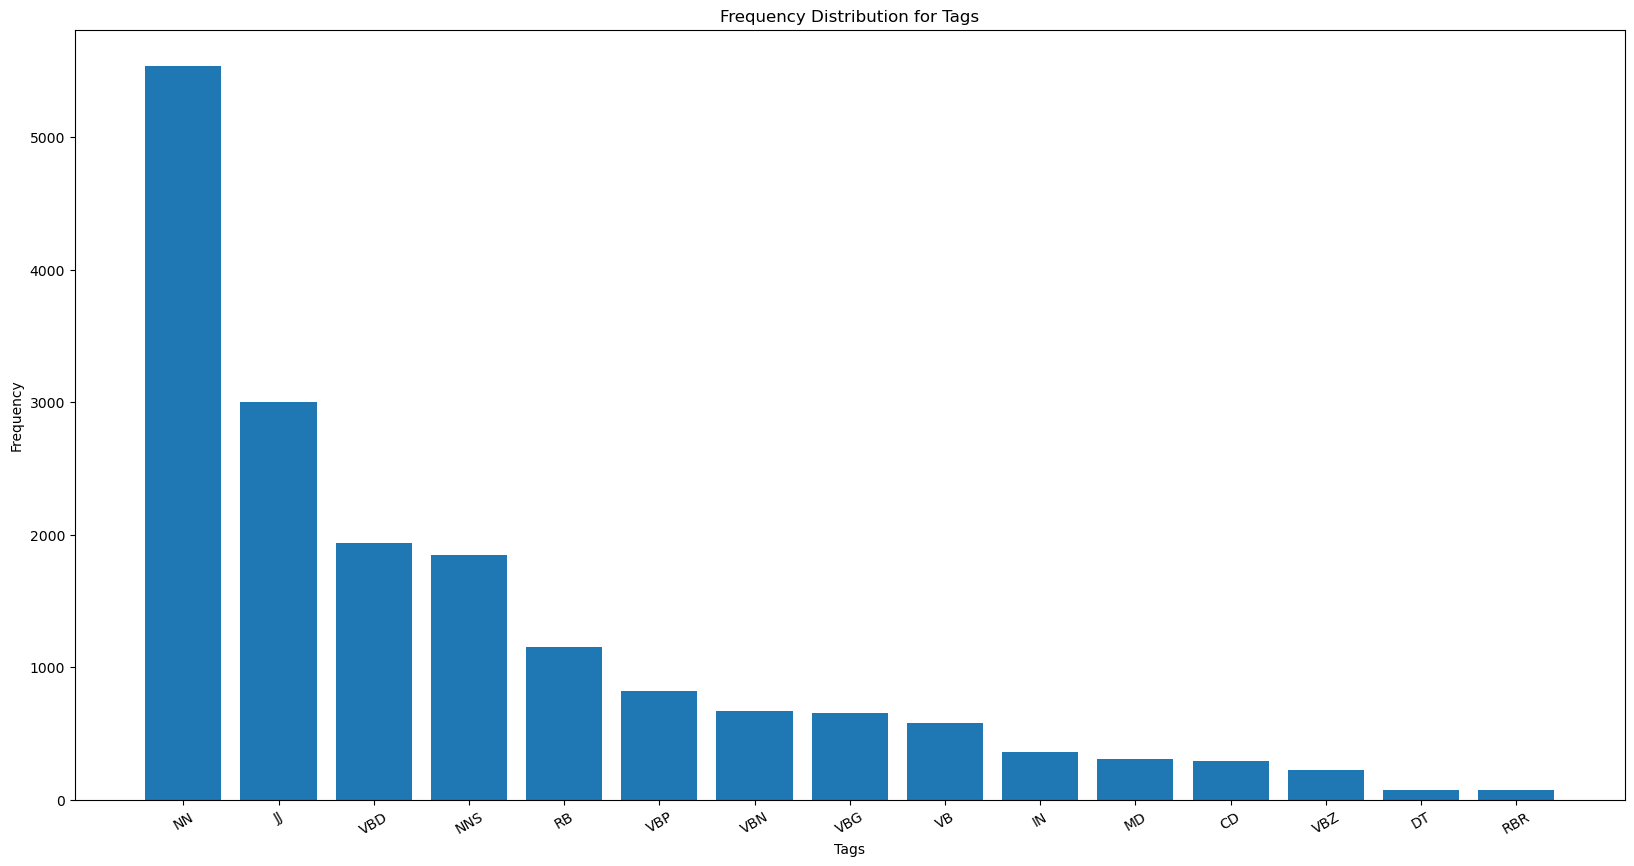

In [14]:
# Creating a bar plot of tag vs their frequency
tagsList = [tag for word, tag in pos_tags]
freq_dist_tags = FreqDist(tagsList)

# We compute the bar plot for 15 most common tags
top_freq_dist_tags = freq_dist_tags.most_common(15)
tagsListed, frequenciesTagsListed = zip(*top_freq_dist_tags)

plt.figure(figsize = (20, 10))
plt.bar(tagsListed, frequenciesTagsListed)
plt.xlabel("Tags")
plt.ylabel("Frequency")
plt.xticks(rotation = 30)  # Rotate the x-axis labels for better readability
plt.title('Frequency Distribution for Tags')
plt.show()